# Analyze and predict GDP of United Kingdom

In [1]:
import wbdata
import pandas as pd
import pycountry
import wbdata
import datetime
import matplotlib.pyplot as plt

 

countries = ["GBR"]

indicators1 = { 
               'BX.KLT.DINV.WD.GD.ZS': 'FDI net inflows', 
               'BM.KLT.DINV.WD.GD.ZS':'FDI net outflows', 
              'SH.XPD.GHED.GD.ZS': 'Domestic health expenditure',
              'GC.XPN.TOTL.GD.ZS': 'Expense on Goods & Services',
              'NE.CON.TOTL.ZS': 'Final consumption expenditure',
                'NV.AGR.TOTL.ZS' : 'Agriculture,forestry,fishing',
               #'SE.ADT.LITR.ZS' : 'Literacy rate',
             'SE.XPD.TOTL.GD.ZS' : 'Edu Exp',
           'GB.XPD.RSDV.GD.ZS' : 'Research and development expenditure'
              }

data_date = (datetime.datetime(1970, 1, 1), datetime.datetime(2015, 1, 1))
 
 
df1 = wbdata.get_dataframe(indicators1, country=countries, data_date=data_date ,convert_date=False)


In [2]:
df1.insert(0, "Country code","GBR")
df1

,Country code,FDI net inflows,FDI net outflows,Domestic health expenditure,Expense on Goods & Services,Final consumption expenditure,"Agriculture,forestry,fishing",Edu Exp,Research and development expenditure
date,,,,,,,,,
2015,GBR,1.547962,-2.054811,7.748258,37.691716,83.966892,0.621473,5.60939,1.66818
2014,GBR,1.922135,-3.718103,7.808670,38.595590,84.284121,0.666984,5.66499,1.65915
2013,GBR,1.955231,1.660105,7.805169,39.312691,84.976059,0.672181,5.58823,1.63938
2012,GBR,1.728382,0.444512,7.002584,41.623446,85.333124,0.660040,NaN,1.59382
2011,GBR,1.015754,3.039646,7.058190,41.016964,85.248623,0.640324,5.64620,1.66488
2010,GBR,2.696079,2.198064,7.147951,42.283512,85.907785,0.621689,5.74164,1.66063
2009,GBR,0.603387,-2.007454,7.224037,41.682568,86.659218,0.694447,5.10687,1.68250
2008,GBR,8.672014,12.204477,6.466842,39.300196,84.681599,0.640091,4.91991,1.62307
2007,GBR,6.756624,11.944835,6.189989,36.481826,83.432796,0.565614,4.94507,1.62165


In [3]:
df1.reset_index(inplace = True)

In [4]:
#df1['Research and development expenditure']= df1['Research and development expenditure'].interpolate(method = 'polynomial', order = 2)
df1['Research and development expenditure'] = df1['Research and development expenditure'].interpolate(method = 'pad')
df1['Domestic health expenditure'] = df1['Domestic health expenditure'].interpolate(method = 'pad')
df1['Agriculture,forestry,fishing'] = df1['Agriculture,forestry,fishing'].interpolate(method = 'pad')
df1['Edu Exp'] = df1['Edu Exp'].interpolate(method = 'polynomial', order = 2)
df1['Edu Exp'] = df1['Edu Exp'].interpolate(method = 'pad')
df1['Expense on Goods & Services'] = df1['Expense on Goods & Services'].interpolate(method = 'pad')
df1

,date,Country code,FDI net inflows,FDI net outflows,Domestic health expenditure,Expense on Goods & Services,Final consumption expenditure,"Agriculture,forestry,fishing",Edu Exp,Research and development expenditure
0,2015,GBR,1.547962,-2.054811,7.748258,37.691716,83.966892,0.621473,5.609390,1.66818
1,2014,GBR,1.922135,-3.718103,7.808670,38.595590,84.284121,0.666984,5.664990,1.65915
2,2013,GBR,1.955231,1.660105,7.805169,39.312691,84.976059,0.672181,5.588230,1.63938
3,2012,GBR,1.728382,0.444512,7.002584,41.623446,85.333124,0.660040,5.556581,1.59382
4,2011,GBR,1.015754,3.039646,7.058190,41.016964,85.248623,0.640324,5.646200,1.66488
5,2010,GBR,2.696079,2.198064,7.147951,42.283512,85.907785,0.621689,5.741640,1.66063
6,2009,GBR,0.603387,-2.007454,7.224037,41.682568,86.659218,0.694447,5.106870,1.68250
7,2008,GBR,8.672014,12.204477,6.466842,39.300196,84.681599,0.640091,4.919910,1.62307
8,2007,GBR,6.756624,11.944835,6.189989,36.481826,83.432796,0.565614,4.945070,1.62165
9,2006,GBR,7.503877,5.242007,6.171074,36.305895,83.857937,0.586946,5.012310,1.58285


In [5]:
#grab indicators above for countires above and load into data frame
#df = wbdata.get_dataframe(indicators, country=countries, data_date=data_date ,convert_date=False)

data_date = (datetime.datetime(1972, 1, 1), datetime.datetime(2017, 1, 1))
indicators2 = {'NY.GDP.PCAP.CD': 'GDP per Capita after 2 years'}
              


In [6]:
#grab indicators above for countires above and load into data frame
df2 = wbdata.get_dataframe(indicators2, country=countries, data_date=data_date ,convert_date=False)

In [7]:
df2

,GDP per Capita after 2 years
date,
2017,40361.417383
2016,41074.167280
2015,44966.101925
2014,47417.635048
2013,43444.564843
2012,42462.714907
2011,42038.500479
2010,39435.839902
2009,38713.137428


In [8]:
df2.reset_index(inplace = True)

In [9]:
df2 = df2.drop(['date'],axis = 1)

In [10]:
df2

,GDP per Capita after 2 years
0,40361.417383
1,41074.167280
2,44966.101925
3,47417.635048
4,43444.564843
5,42462.714907
6,42038.500479
7,39435.839902
8,38713.137428
9,47286.998493


In [11]:
df_joined = pd.merge(df1,df2,left_index=True, right_index=True)
df_joined

,date,Country code,FDI net inflows,FDI net outflows,Domestic health expenditure,Expense on Goods & Services,Final consumption expenditure,"Agriculture,forestry,fishing",Edu Exp,Research and development expenditure,GDP per Capita after 2 years
0,2015,GBR,1.547962,-2.054811,7.748258,37.691716,83.966892,0.621473,5.609390,1.66818,40361.417383
1,2014,GBR,1.922135,-3.718103,7.808670,38.595590,84.284121,0.666984,5.664990,1.65915,41074.167280
2,2013,GBR,1.955231,1.660105,7.805169,39.312691,84.976059,0.672181,5.588230,1.63938,44966.101925
3,2012,GBR,1.728382,0.444512,7.002584,41.623446,85.333124,0.660040,5.556581,1.59382,47417.635048
4,2011,GBR,1.015754,3.039646,7.058190,41.016964,85.248623,0.640324,5.646200,1.66488,43444.564843
5,2010,GBR,2.696079,2.198064,7.147951,42.283512,85.907785,0.621689,5.741640,1.66063,42462.714907
6,2009,GBR,0.603387,-2.007454,7.224037,41.682568,86.659218,0.694447,5.106870,1.68250,42038.500479
7,2008,GBR,8.672014,12.204477,6.466842,39.300196,84.681599,0.640091,4.919910,1.62307,39435.839902
8,2007,GBR,6.756624,11.944835,6.189989,36.481826,83.432796,0.565614,4.945070,1.62165,38713.137428
9,2006,GBR,7.503877,5.242007,6.171074,36.305895,83.857937,0.586946,5.012310,1.58285,47286.998493


In [12]:
# Normalizing the data in the rings column beacuse the value is too high when compared to independent variable

from sklearn import preprocessing

# Create x, where x the 'scores' column's values as floats
x = df_joined[['FDI net inflows','FDI net outflows','Domestic health expenditure','Expense on Goods & Services','Final consumption expenditure','Agriculture,forestry,fishing','Research and development expenditure','GDP per Capita after 2 years']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_joined[['FDI net inflows','FDI net outflows','Domestic health expenditure','Expense on Goods & Services','Final consumption expenditure','Agriculture,forestry,fishing','Research and development expenditure','GDP per Capita after 2 years']] = pd.DataFrame(x_scaled)

In [13]:
df_joined.corr()

,FDI net inflows,FDI net outflows,Domestic health expenditure,Expense on Goods & Services,Final consumption expenditure,"Agriculture,forestry,fishing",Edu Exp,Research and development expenditure,GDP per Capita after 2 years
FDI net inflows,1.000000,0.835249,0.083774,-0.102203,-0.437783,-0.533426,-0.375679,0.014151,0.495522
FDI net outflows,0.835249,1.000000,-0.206027,-0.242116,-0.389070,-0.272474,-0.483479,-0.049037,0.242299
Domestic health expenditure,0.083774,-0.206027,1.000000,0.670267,-0.170337,-0.824857,0.392100,0.699845,0.746809
Expense on Goods & Services,-0.102203,-0.242116,0.670267,1.000000,0.274240,-0.490269,0.436138,0.462044,0.506296
Final consumption expenditure,-0.437783,-0.389070,-0.170337,0.274240,1.000000,0.439577,0.402234,-0.073134,-0.451709
"Agriculture,forestry,fishing",-0.533426,-0.272474,-0.824857,-0.490269,0.439577,1.000000,-0.090014,-0.543349,-0.917627
Edu Exp,-0.375679,-0.483479,0.392100,0.436138,0.402234,-0.090014,1.000000,0.236090,-0.103493
Research and development expenditure,0.014151,-0.049037,0.699845,0.462044,-0.073134,-0.543349,0.236090,1.000000,0.422576
GDP per Capita after 2 years,0.495522,0.242299,0.746809,0.506296,-0.451709,-0.917627,-0.103493,0.422576,1.000000


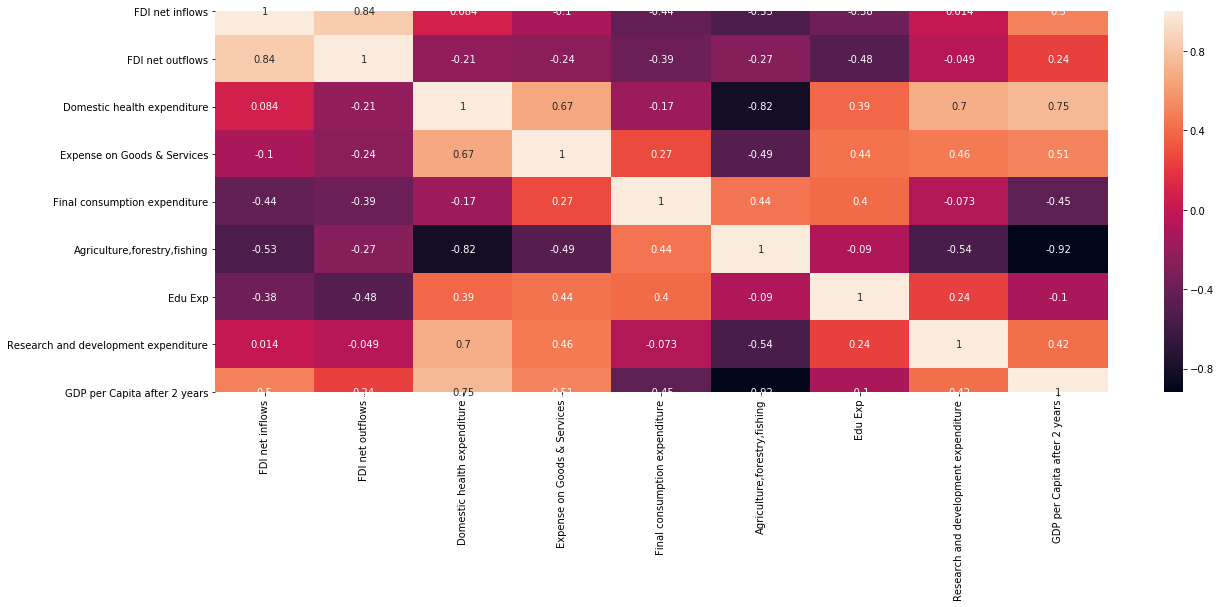

In [14]:
import seaborn as sns
#plotting the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(df_joined.corr(), annot=True)

In [15]:
df_joined

,date,Country code,FDI net inflows,FDI net outflows,Domestic health expenditure,Expense on Goods & Services,Final consumption expenditure,"Agriculture,forestry,fishing",Edu Exp,Research and development expenditure,GDP per Capita after 2 years
0,2015,GBR,0.161879,0.077963,0.979374,0.658487,0.291425,0.065349,5.609390,0.897860,0.785314
1,2014,GBR,0.199194,0.000000,1.000000,0.725712,0.323428,0.118590,5.664990,0.833452,0.800308
2,2013,GBR,0.202494,0.252090,0.998805,0.779046,0.393234,0.124670,5.588230,0.692439,0.882180
3,2012,GBR,0.179871,0.195112,0.724784,0.950908,0.429257,0.110466,5.556581,0.367475,0.933752
4,2011,GBR,0.108803,0.316753,0.743769,0.905801,0.420732,0.087402,5.646200,0.874322,0.850172
5,2010,GBR,0.276376,0.277306,0.774416,1.000000,0.487231,0.065600,5.741640,0.844009,0.829518
6,2009,GBR,0.067679,0.080182,0.800393,0.955305,0.563040,0.150718,5.106870,1.000000,0.820594
7,2008,GBR,0.872336,0.746332,0.541869,0.778117,0.363528,0.087128,4.919910,0.576106,0.765843
8,2007,GBR,0.681321,0.734162,0.447345,0.568501,0.237542,0.000000,4.945070,0.565977,0.750640
9,2006,GBR,0.755841,0.419983,0.440887,0.555417,0.280433,0.024956,5.012310,0.289230,0.931004


In [16]:
#Using OLS for finding the p value and t statistics 
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = sm.OLS(df_joined['GDP per Capita after 2 years'], df_joined[['FDI net inflows','FDI net outflows','Domestic health expenditure','Expense on Goods & Services', 'Final consumption expenditure','Agriculture,forestry,fishing','Research and development expenditure']]).fit()

# Print out the statistic
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     GDP per Capita after 2 years   R-squared (uncentered):                   0.930
Model:                                      OLS   Adj. R-squared (uncentered):              0.917
Method:                           Least Squares   F-statistic:                              73.60
Date:                          Wed, 22 Apr 2020   Prob (F-statistic):                    1.76e-20
Time:                                  23:43:06   Log-Likelihood:                          23.953
No. Observations:                            46   AIC:                                     -33.91
Df Residuals:                                39   BIC:                                     -21.11
Df Model:                                     7                                                  
Covariance Type:                      nonrobust                                                  
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
FDI net inflows                          0.3764      0.219      1.722      0.093      -0.066       0.818
FDI net outflows                         0.3726      0.283      1.317      0.195      -0.199       0.945
Domestic health expenditure              0.6864      0.191      3.594      0.001       0.300       1.073
Expense on Goods & Services              0.4527      0.151      2.997      0.005       0.147       0.758
Final consumption expenditure           -0.3354      0.159     -2.107      0.042      -0.657      -0.013
Agriculture,forestry,fishing             0.1002      0.094      1.069      0.292      -0.089       0.290
Research and development expenditure    -0.1690      0.164     -1.028      0.310      -0.502       0.164
==============================================================================
Omnibus:                        2.121   Durbin-Watson:                   0.863
Prob(Omnibus):                  0.346   Jarque-Bera (JB):                1.326
Skew:                           0.392   Prob(JB):                        0.515
Kurtosis:                       3.277   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### For any modelling task, the hypothesis is that there is some correlation between the features and the target. The null hypothesis is therefore the opposite: there is no correlation between the features and the target.

Considering the significance value of 0.05.

1. The **FDI net inflows** has the p-value 0.953, which is greater and this provides less evidence against the null hypothesis and it    is not a significant feature.
2.  The **FDI net outflows** has the p-value 0.903, which is greater and this provides less evidence against the null hypothesis and it    is not a significant feature.
2. The **Domestic health expenditure** has the p-value 	0.008, which is less and this provides greater evidence against the null hypothesis and      it is a significant feature.
3. The **Expense on Goods & Services** has the p-value 0.225, which is greater and this provides less evidence against the null hypothesis and it    is not a significant feature.
4. The **Final consumption expenditure** has the p-value 0.000, which is less and this provides greater evidence against the null hypothesis and      it is a significant feature.
5. The **Agriculture,forestry,fishing** has the p-value 0.001, which is less and this provides greater evidence against the null hypothesis and      it is a significant feature.
6. The **Education expenditure** has the p-value 0.681, which is greater and this provides less evidence against the null hypothesis and it    is not a significant feature.
7. The **Research and development expenditure** has the p-value 0.000, which is less and this provides greater evidence against the null hypothesis and      it is a significant feature.

### Train, test and validation split

Data is split into 3 parts 

Taining data set = 80.75%

Validation data set = 14.25%

Test data set = 5%

In [17]:
from sklearn.model_selection import  train_test_split

X = df_joined[['Domestic health expenditure','Expense on Goods & Services','Final consumption expenditure']]

y = df_joined['GDP per Capita after 2 years']

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.05, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

### Linear Regression

In [18]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_train)

In [20]:
#training Data
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))

Coefficients: 
 [ 0.44728232  0.41163337 -0.69772402]
Mean squared error: 0.03
Coefficient of determination: 0.67


In [21]:
# Make predictions using the testing set
y_pred = regr.predict(X_val)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))

Coefficients: 
 [ 0.44728232  0.41163337 -0.69772402]
Mean squared error: 0.02
Coefficient of determination: 0.80


In [22]:
y_pred

array([0.21888651, 0.24774278, 0.37170294, 0.54413289, 0.05037484,
       0.78053691, 0.00802164])

In [23]:
# Get R2 measure (indicator of accuracy 1 is perfect 0 is horrible)
regr.score(X_test, y_test)

0.8364029840823197

Text(0, 0.5, 'Predictions')

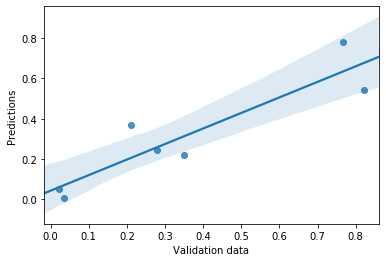

In [24]:
## The line / model
import matplotlib.pyplot as plt
import seaborn as sns

#plt.scatter(y_test, y_pred)
sns.regplot(y_val,y_pred)
plt.xlabel('Validation data')
plt.ylabel('Predictions')

### Random forest

#### Train,test and validation split

Data is split into 3 parts 

Taining data set = 80.75%

Validation data set = 14.25%

Test data set = 5%

In [26]:
from sklearn.model_selection import  train_test_split

X = df_joined[['FDI net inflows','FDI net outflows','Domestic health expenditure','Final consumption expenditure','Agriculture,forestry,fishing','Research and development expenditure']]

y = df_joined['GDP per Capita after 2 years']

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.05, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [27]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

random_model = RandomForestRegressor(n_estimators =100,
 min_samples_split = 10,
 min_samples_leaf = 15,
 max_features= 'auto',
 max_depth = 20,
 bootstrap = True)
random_model.fit(X_train, y_train)
r2_score(y_train, random_model.predict(X_train))

-0.00016943550683912179

In [28]:
print('R2 score for training data' ,r2_score(y_train, random_model.predict(X_train)))
print('R2 score for test data',r2_score(y_test, random_model.predict(X_test)))

      
print('Root mean square error score on training set',np.sqrt(mean_squared_error(y_train,random_model.predict(X_train))))
print('Root mean square error score on test set',np.sqrt(mean_squared_error(y_test,random_model.predict(X_test))))


R2 score for training data -0.00016943550683912179
R2 score for test data -0.10748804760095343
Root mean square error score on training set 0.3094294145102016
Root mean square error score on test set 0.4034378862983093


Data is underfitting so using hyperparameters

In [29]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [30]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   35.6s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [31]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': False}

In [32]:
from sklearn.ensemble import RandomForestRegressor


random_model = RandomForestRegressor(n_estimators =600,
 min_samples_split = 5,
 min_samples_leaf = 2,
 max_features= 'auto',
 max_depth = 70,
 bootstrap = False)
random_model.fit(X_train, y_train)
print('Training score is',r2_score(y_train, random_model.predict(X_train)))

Training score is 0.9920718186367727


In [33]:
print('Testing score is ',r2_score(y_test, random_model.predict(X_test)))

rmse = np.sqrt(mean_squared_error(y_test,random_model.predict(X_test)))
print('Root mean square error is',rmse)

Testing score is  0.905314872694822
Root mean square error is 0.11796360590478706


### Artifical Neural Network

In [34]:
train_dataset = df_joined.sample(frac=0.8,random_state=0)
test_dataset = df_joined.drop(train_dataset.index)

In [35]:
train_dataset = train_dataset.drop('Country code',axis =1)
train_dataset = train_dataset.drop('date',axis =1)

In [36]:
test_dataset = test_dataset.drop('Country code',axis =1)
test_dataset = test_dataset.drop('date',axis =1)

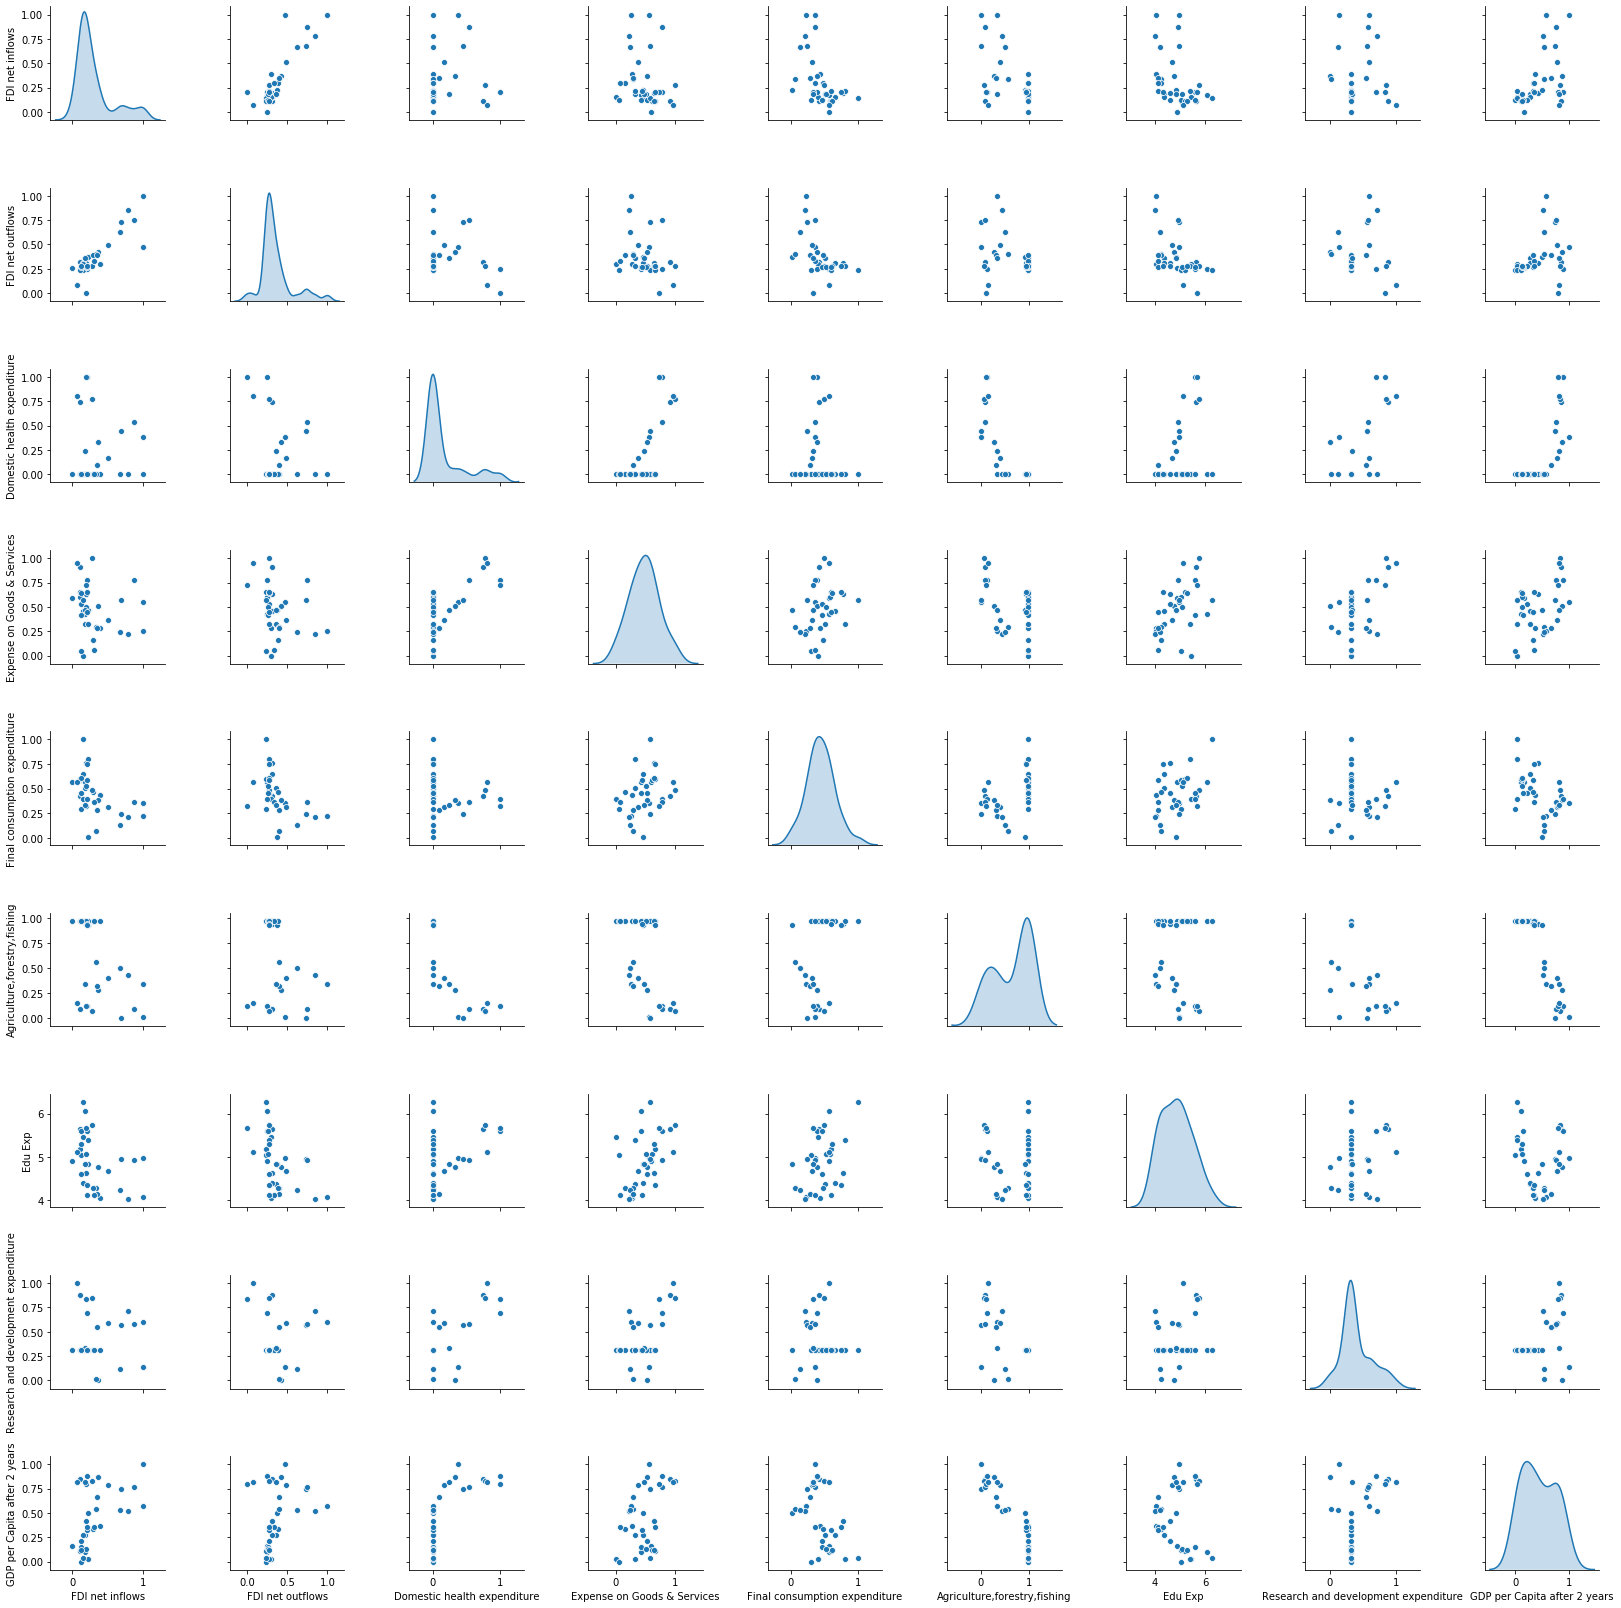

In [37]:
sns.pairplot(train_dataset, diag_kind="kde")

In [38]:
train_stats = train_dataset.describe()
train_stats.pop("GDP per Capita after 2 years")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
FDI net inflows,37.0,0.305711,0.260274,0.000000,0.144398,0.202039,0.348537,1.00000
FDI net outflows,37.0,0.363607,0.198681,0.000000,0.267441,0.295546,0.395493,1.00000
Domestic health expenditure,37.0,0.176174,0.311135,0.000000,0.000000,0.000000,0.240248,1.00000
Expense on Goods & Services,37.0,0.477840,0.243762,0.000000,0.290149,0.472546,0.634483,1.00000
Final consumption expenditure,37.0,0.444942,0.205278,0.010133,0.323428,0.431892,0.565965,1.00000
"Agriculture,forestry,fishing",37.0,0.652801,0.384902,0.000000,0.324936,0.944778,0.975930,0.97593
Edu Exp,37.0,4.881314,0.606868,4.017670,4.334490,4.899060,5.288420,6.26878
Research and development expenditure,37.0,0.408498,0.230262,0.000000,0.317689,0.317689,0.565977,1.00000


In [39]:
train_labels = train_dataset.pop('GDP per Capita after 2 years')
test_labels = test_dataset.pop('GDP per Capita after 2 years')

In [40]:
def norm(a):
    return (a - train_stats['mean']) / train_stats['std']


In [41]:
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [42]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.keras.layers import Input, Dense

In [43]:

def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [44]:
model = build_model()

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [46]:
example_batch = normed_train_data[:9]
example_result = model.predict(example_batch)
example_result

array([[ 0.03874503],
       [ 0.11084669],
       [-0.02060276],
       [-0.40960017],
       [ 0.11331928],
       [-0.09347818],
       [ 0.02228205],
       [ 0.01476445],
       [ 0.11976486]], dtype=float32)

In [47]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [48]:
earlystopper = EarlyStopping(patience=3, verbose=1)

filepath = "model.h5"

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min')

 

callbacks_list = [earlystopper, checkpoint]

In [49]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=1,
  callbacks=callbacks_list)

Train on 29 samples, validate on 8 samples
Epoch 1/1000

Epoch 00001: val_loss improved from inf to 0.22214, saving model to model.h5
29/29 [==============================] - 0s 4ms/sample - loss: 0.2799 - mae: 0.4068 - mse: 0.2799 - val_loss: 0.2221 - val_mae: 0.3298 - val_mse: 0.2221
Epoch 2/1000

Epoch 00002: val_loss improved from 0.22214 to 0.13940, saving model to model.h5
29/29 [==============================] - 0s 516us/sample - loss: 0.1573 - mae: 0.2779 - mse: 0.1573 - val_loss: 0.1394 - val_mae: 0.2599 - val_mse: 0.1394
Epoch 3/1000

Epoch 00003: val_loss improved from 0.13940 to 0.09108, saving model to model.h5
29/29 [==============================] - 0s 481us/sample - loss: 0.1047 - mae: 0.2240 - mse: 0.1047 - val_loss: 0.0911 - val_mae: 0.2136 - val_mse: 0.0911
Epoch 4/1000

Epoch 00004: val_loss improved from 0.09108 to 0.06101, saving model to model.h5
29/29 [==============================] - 0s 481us/sample - loss: 0.0732 - mae: 0.1881 - mse: 0.0732 - val_loss: 0.0610

In [50]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
4,0.051878,0.159160,0.051878,0.045935,0.132127,0.045935,4
5,0.036908,0.136672,0.036908,0.041185,0.113885,0.041185,5
6,0.027058,0.118843,0.027058,0.041672,0.120078,0.041672,6
7,0.020795,0.104326,0.020795,0.044374,0.135822,0.044374,7
8,0.016740,0.092768,0.016740,0.048116,0.147773,0.048116,8


In [51]:

print(history.history.keys())

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


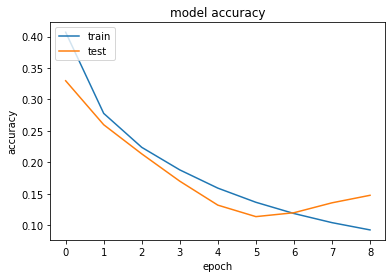

In [52]:
# summarize history for accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize h

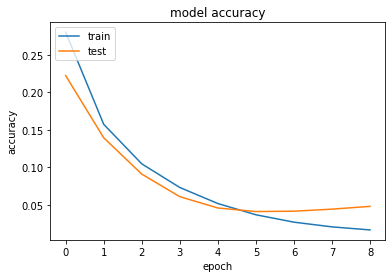

In [53]:
# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize h

In [54]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop])

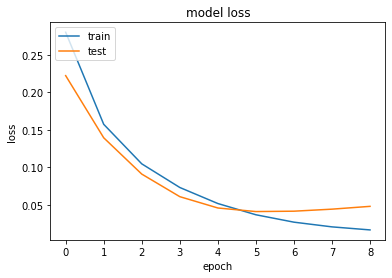

In [55]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f}".format(mae))

9/9 - 0s - loss: 0.0226 - mae: 0.1066 - mse: 0.0226
Testing set Mean Abs Error:  0.11


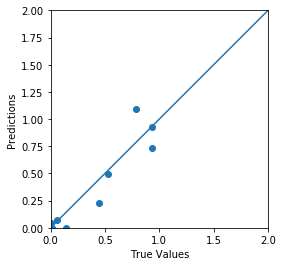

In [57]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [58]:
print ("linear regression test score:", test_score)
print('Random forest testing score is ',r2_score(y_test, random_model.predict(X_test)))
print("ANN testing score is", (1 - loss))

linear regression test score: 0.8364029840823197
Random forest testing score is  0.905314872694822
ANN testing score is 0.9773677252233028
